In [2]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import tensorlayer as tl
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [18]:
data=pd.read_csv('big_testset_task2_version2.csv')

In [19]:
data.pop('holiday')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
390    0.0
391    0.0
392    0.0
393    0.0
394    0.0
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
400    0.0
401    0.0
402    0.0
403    0.0
404    0.0
405    0.0
406    0.0
407    0.0
408    0.0
409    0.0
410    0.0
411    0.0
412    0.0
413    0.0
414    0.0
415    0.0
416    0.0
417    0.0
418    0.0
419    0.0
Name: holiday, dtype: float64

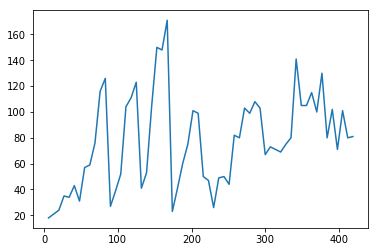

In [91]:
plt.plot(data[data.Monday==1].volume)

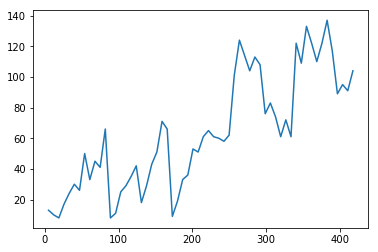

In [93]:
plt.plot(data[data.Sunday==1].volume)

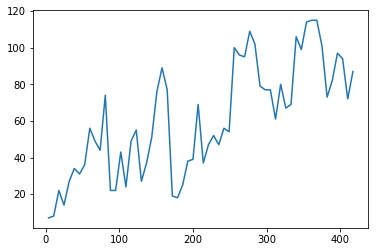

In [92]:
plt.plot(data[data.Saturday==1].volume)

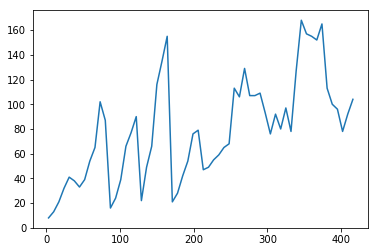

In [90]:
plt.plot(data[data.Friday==1].volume)

In [95]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tollgate_id,420.0,2.000000,0.895494,1.0,1.0,2.00,3.00,3.0
direction,420.0,0.400000,0.490482,0.0,0.0,0.00,1.00,1.0
volume,420.0,70.097619,35.683206,7.0,41.0,70.00,99.00,171.0
Friday,420.0,0.142857,0.350344,0.0,0.0,0.00,0.00,1.0
Monday,420.0,0.142857,0.350344,0.0,0.0,0.00,0.00,1.0
Saturday,420.0,0.142857,0.350344,0.0,0.0,0.00,0.00,1.0
Sunday,420.0,0.142857,0.350344,0.0,0.0,0.00,0.00,1.0
Thursday,420.0,0.142857,0.350344,0.0,0.0,0.00,0.00,1.0
Tuesday,420.0,0.142857,0.350344,0.0,0.0,0.00,0.00,1.0
Wednesday,420.0,0.142857,0.350344,0.0,0.0,0.00,0.00,1.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 45 columns):
tollgate_id       420 non-null int64
time_window       420 non-null object
direction         420 non-null int64
volume            420 non-null int64
Friday            420 non-null int64
Monday            420 non-null int64
Saturday          420 non-null int64
Sunday            420 non-null int64
Thursday          420 non-null int64
Tuesday           420 non-null int64
Wednesday         420 non-null int64
hour__0           420 non-null int64
hour__1           420 non-null int64
hour__2           420 non-null int64
hour__3           420 non-null int64
hour__4           420 non-null int64
hour__5           420 non-null int64
hour__6           420 non-null int64
hour__7           420 non-null int64
hour__8           420 non-null int64
hour__9           420 non-null int64
hour__10          420 non-null int64
hour__11          420 non-null int64
hour__12          420 non-null int64
hour__

In [88]:
type(data['pressure'][0])

numpy.float64

In [63]:
for i in data.columns:
    print(i)

tollgate_id
time_window
direction
volume
Friday
Monday
Saturday
Sunday
Thursday
Tuesday
Wednesday
hour__0
hour__1
hour__2
hour__3
hour__4
hour__5
hour__6
hour__7
hour__8
hour__9
hour__10
hour__11
hour__12
hour__13
hour__14
hour__15
hour__16
hour__17
hour__18
hour__19
hour__20
hour__21
hour__22
hour__23
0
20
40
pressure
sea_pressure
wind_direction
wind_speed
temperature
rel_humidity
precipitation


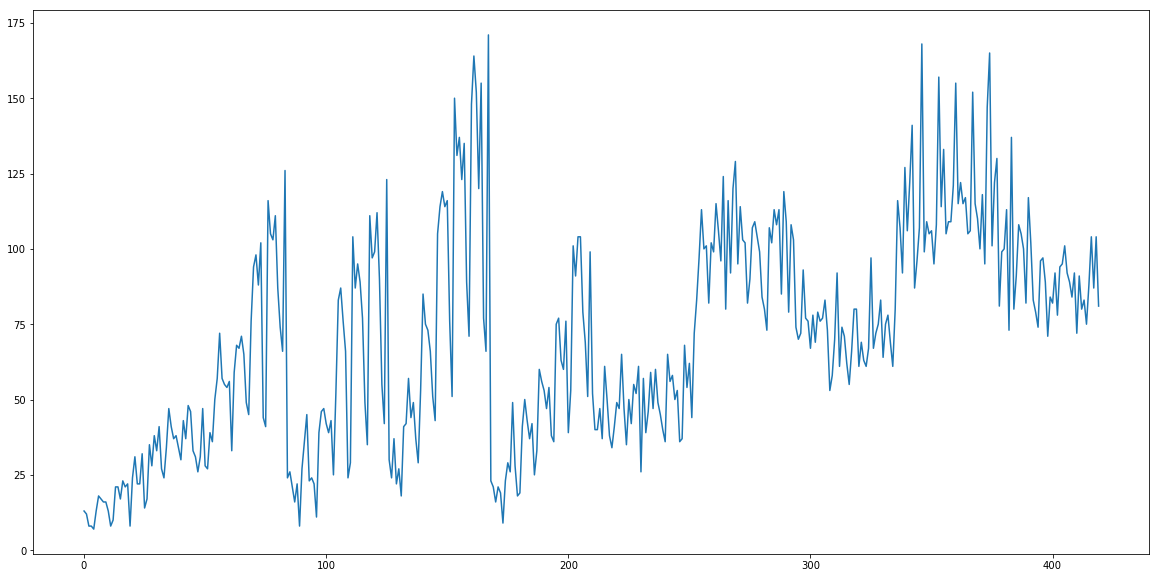

In [49]:
plt.figure(figsize=(20,10))
plt.plot(data.volume)
plt.show()

In [54]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time

In [53]:
warnings.filterwarnings("ignore")

In [56]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.024468660354614258


In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

In [55]:
def build_model(layers):
    model = Sequential()
    model.add(
        LSTM(input_dim=layers[0], output_dim=layers[1], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(layers[2], return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("Compilation Time : ", time.time() - start)
    return model

def predict_point_by_point(model, data):
    # Predict each timestep given the last sequence of true data, in effect
    # only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

def predict_sequence_full(model, data, window_size):
    # Shift the window by 1 new prediction each time, re-run predictions on
    # new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis, :, :])[0, 0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(
            curr_frame, [window_size - 1], predicted[-1], axis=0)
    return predicted


def predict_sequences_multiple(model, data, window_size, prediction_len):
    # Predict sequence of 50 steps before shifting prediction run forward by
    # 50 steps
    prediction_seqs = []
    for i in range(round(len(data) / prediction_len) - 1):
        print
        curr_frame = data[i * prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis, :, :])[0, 0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(
                curr_frame, [window_size - 1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs